In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


/home/adam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

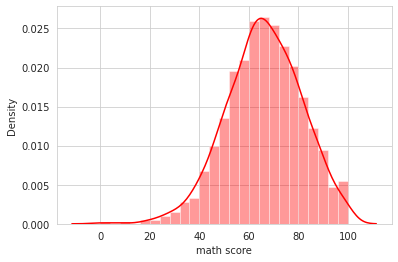

In [40]:
sns.distplot(df['math score'],color='r')

/home/adam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

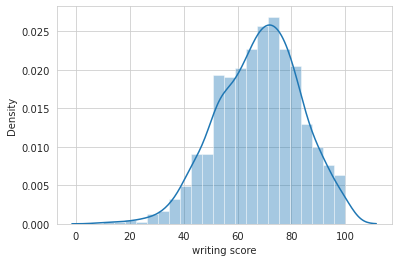

In [41]:
sns.distplot(df['writing score'])

/home/adam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

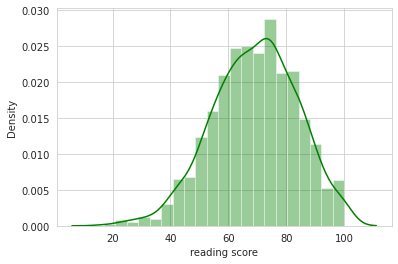

In [42]:
sns.distplot(df['reading score'],color='g')

In [43]:
df['Total score']=df['writing score']+df['math score']+df['reading score']
df['Average score']=df['Total score']/3


In [44]:
def GetGrade(Percentage):    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'   
    
df['Grade'] = df.apply(lambda x : GetGrade(x['Average score']), axis=1)

/home/adam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average score', ylabel='Density'>

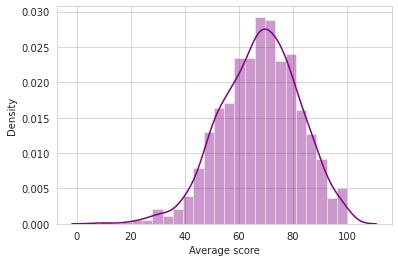

In [58]:
sns.distplot(df['Average score'],color='purple')

<AxesSubplot:xlabel='Grade', ylabel='count'>

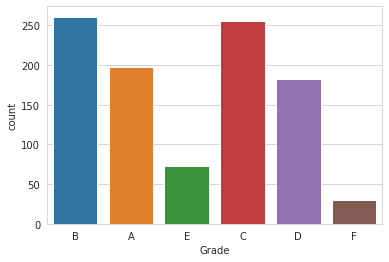

In [45]:
sns.countplot(x='Grade',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

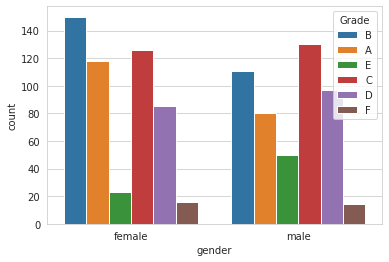

In [47]:
sns.countplot(x='gender',data=df,hue='Grade')

[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

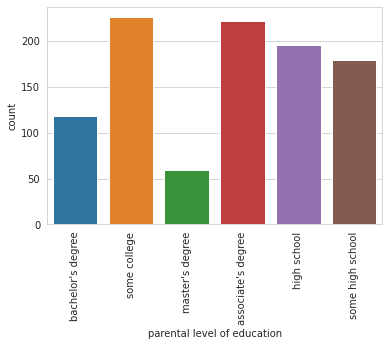

In [56]:
g=sns.countplot(x='parental level of education',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

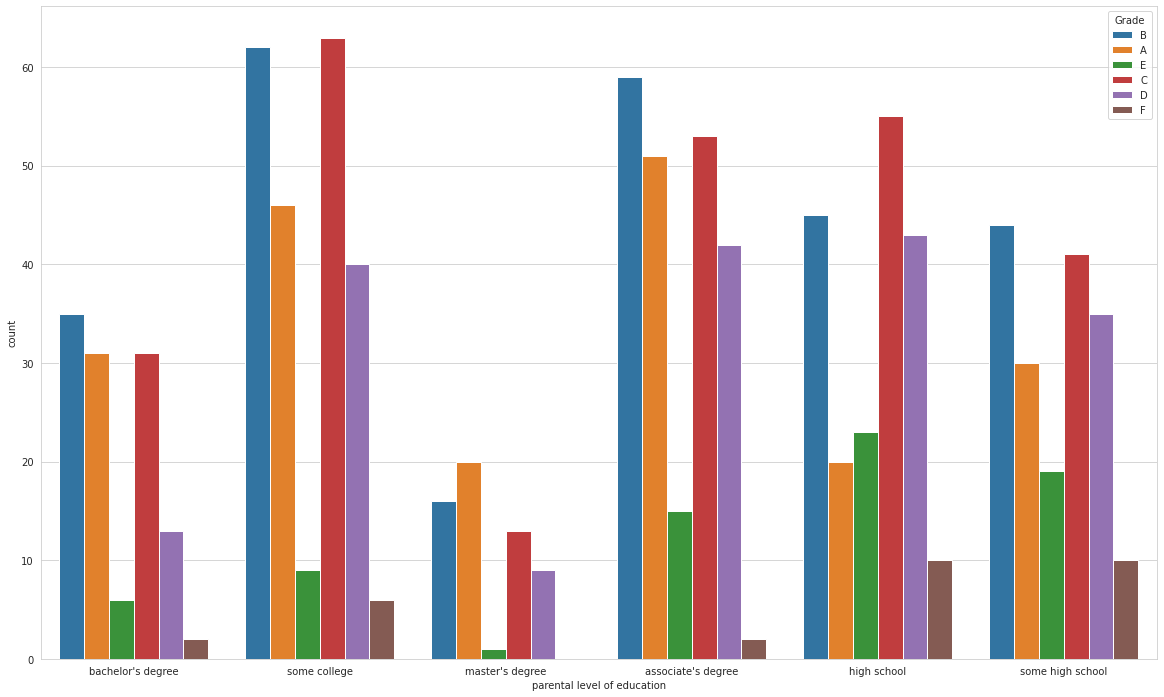

In [51]:
plt.figure(figsize=(20,12))
g=sns.countplot(x='parental level of education',data=df,hue='Grade')
g.set_xticklabels(g.get_xticklabels())
plt.show()

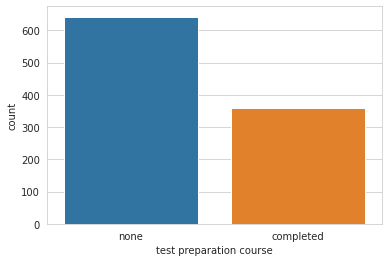

In [53]:
g=sns.countplot(x='test preparation course',data=df)

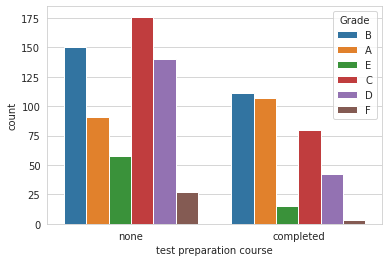

In [57]:
g=sns.countplot(x='test preparation course',data=df,hue='Grade')

In [64]:
df['gender']=df['gender'].replace({'female':1,'male':0})
df['race/ethnicity']=df['race/ethnicity'].replace({'group A':0,'group B':1,'group C':2,'group D':3,
                                                  'group E':4})
df['parental level of education']=df['parental level of education'].replace({'some college':0,
                                                                            "associate's degree":1,
                                                                            'high school':2,
                                                                            'some high school':3,
                                                                            "bachelor's degree":4,
                                                                            "master's degree":5})
df['lunch']=df['lunch'].replace({'standard':0,'free/reduced':1})
df['test preparation course']=df['test preparation course'].replace({'none':0,'completed':1})

In [67]:
df['Grade']=df['Grade'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5})

In [74]:
from sklearn.model_selection import train_test_split
x=df.drop('Grade',axis=1)
y=df['Grade']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.ensemble import RandomForestClassifier
reg=RandomForestClassifier()
reg.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
reg.score(x_test,y_test)

0.995